### **Exploratory Data Analysis**


* * *


In [14]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [15]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [16]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.(This assumes 12 working months and 50 working weeks)


#### Distribution Curve and Histogram of the column ConvertedComp


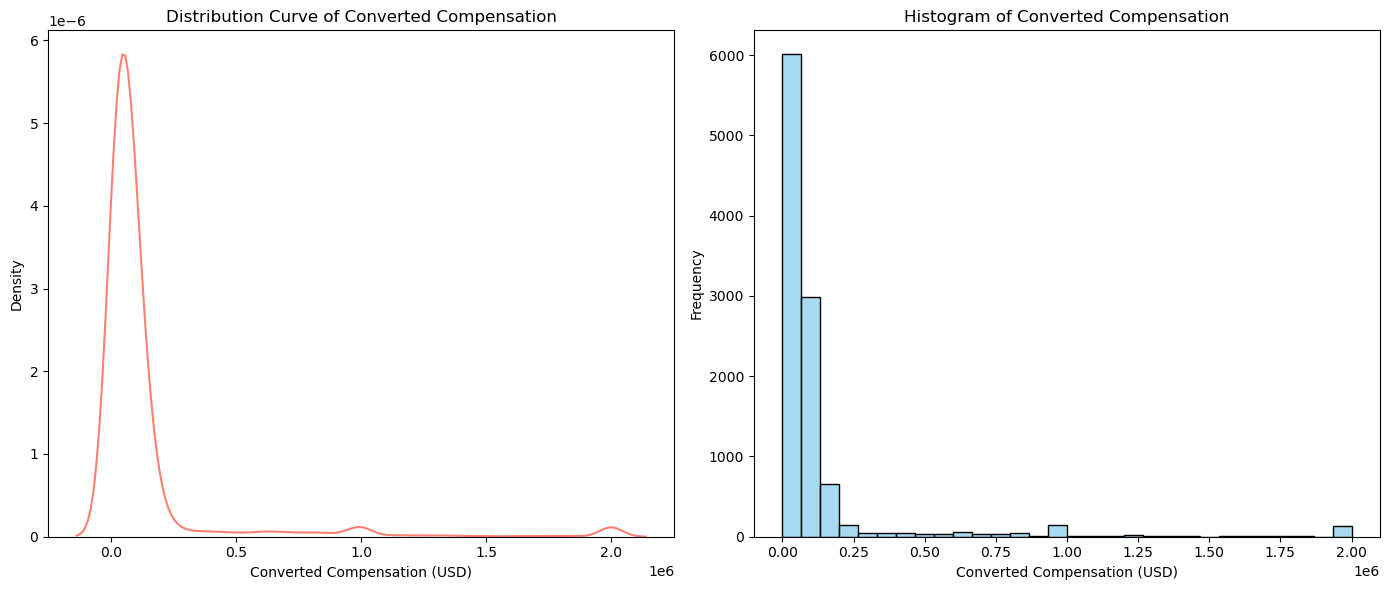

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
# Distribution Curve (Density Plot)
sns.kdeplot(data=df, x='ConvertedComp',ax=axes[0], color='salmon')
axes[0].set_title('Distribution Curve of Converted Compensation')
axes[0].set_xlabel('Converted Compensation (USD)')
axes[0].set_ylabel('Density')

# Histogram
sns.histplot(data=df, x='ConvertedComp', bins=30, kde=False, ax=axes[1], color='skyblue')
axes[1].set_title('Histogram of Converted Compensation')
axes[1].set_xlabel('Converted Compensation (USD)')
axes[1].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

In [66]:
# Median of the column ConvertedComp
df['ConvertedComp'].median()

57745.0

In [67]:
num_men_only = df[df['Gender'] == 'Man'].shape[0]
print(num_men_only,"responders identified themselves only as a Man")

10480 responders identified themselves only as a Man


In [68]:
woman_df = df[df['Gender'] == 'Woman']
median_w_only = woman_df['ConvertedComp'].median()
print(median_w_only,"is the median Compenstaion of responders who identified themselves only as Woman")

57708.0 is the median Compenstaion of responders who identified themselves only as Woman


#### Five number summary for the column `Age`


In [28]:
minimum_age = df['Age'].min()
first_quartile = df['Age'].quantile(0.25)
median_age = df['Age'].median()
third_quartile = df['Age'].quantile(0.75)
maximum_age = df['Age'].max()

# Print the five-number summary
print("Minimum age:", minimum_age)
print("First quartile (Q1):", first_quartile)
print("Median age (Q2):", median_age)
print("Third quartile (Q3):", third_quartile)
print("Maximum age:", maximum_age)


Minimum age: 16.0
First quartile (Q1): 25.0
Median age (Q2): 29.0
Third quartile (Q3): 35.0
Maximum age: 99.0


#### Histogram of the column Age

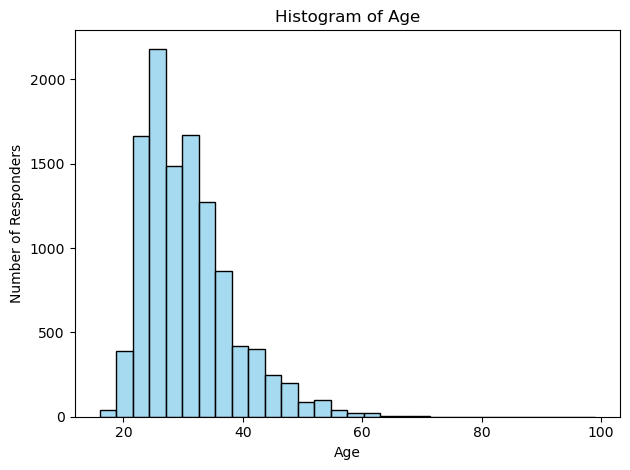

In [35]:
# Histogram
sns.histplot(data=df, x='Age', bins=30, kde=False, color='skyblue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Number of Responders')

# Show the plot
plt.tight_layout()
plt.show()


## Outliers


### Finding outliers


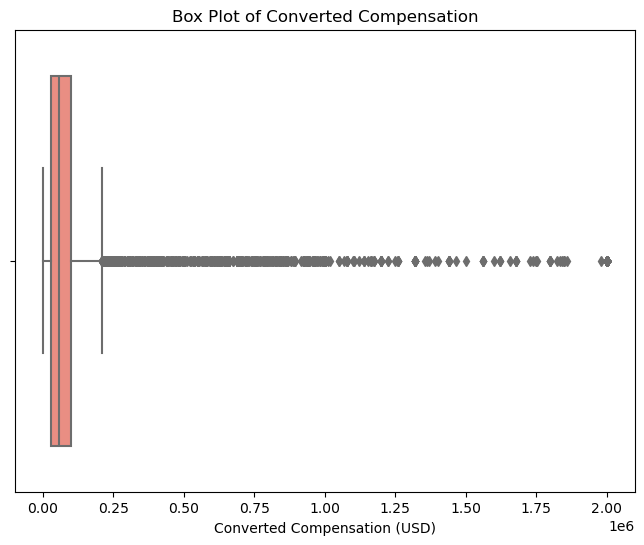

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['ConvertedComp'],color='salmon')
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.show()


In [42]:
# Calculate the first quartile (Q1)
Q1 = df['ConvertedComp'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

In [43]:
# Find out the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [44]:
# Identify outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
# Count the number of outliers
num_outliers = len(outliers)

In [45]:
print("Interquartile Range (IQR) for ConvertedComp:", IQR)
print("Lower Bound for ConvertedComp:", lower_bound)
print("Upper Bound for ConvertedComp:", upper_bound)
print("Number of outliers in ConvertedComp column:", num_outliers)

Interquartile Range (IQR) for ConvertedComp: 73132.0
Lower Bound for ConvertedComp: -82830.0
Upper Bound for ConvertedComp: 209698.0
Number of outliers in ConvertedComp column: 879


In [46]:
# Create a new DataFrame by removing outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

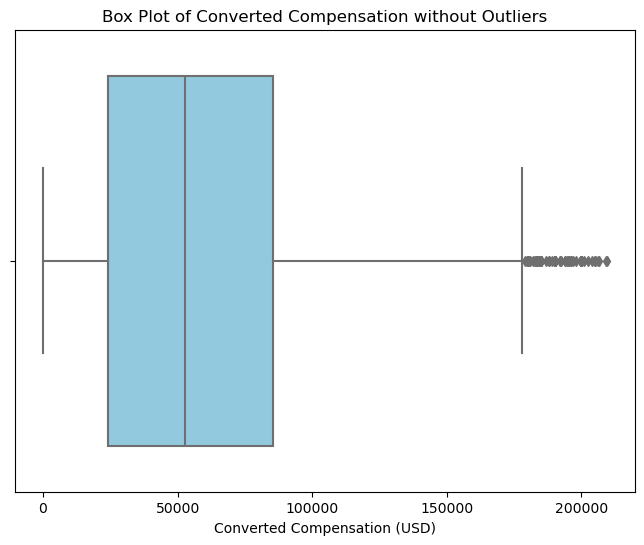

In [50]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_no_outliers['ConvertedComp'],color='skyblue')
plt.title('Box Plot of Converted Compensation without Outliers')
plt.xlabel('Converted Compensation (USD)')
plt.show()


#### Correlation between `Age` and all other numerical columns

In [52]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

age_corr = df[numerical_columns].corrwith(df['Age'])

print("Correlation between Age and other numerical columns (excluding categorical):")
print(age_corr)

Correlation between Age and other numerical columns (excluding categorical):
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
dtype: float64
